# LOGISTIC REGRESSION

[Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic).

We'll be trying to predict a classification- survival or deceased.
Implementation of Logistic Regression in Python for classification.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('/resources/titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


EXPLORATORY DATA ANALISYS

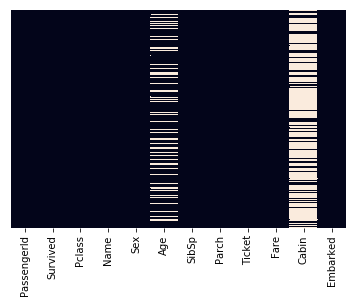

In [4]:
sns.heatmap(train.isnull(), cbar=False,yticklabels = False)

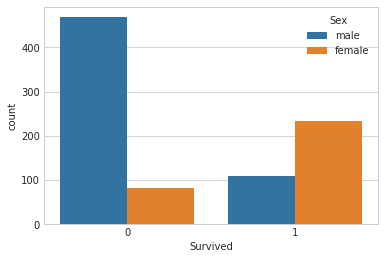

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue='Sex')

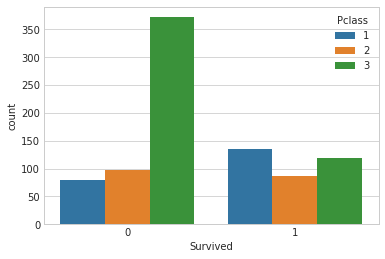

In [6]:
sns.countplot(x='Survived', data=train, hue='Pclass')

/home/jupyterlab/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


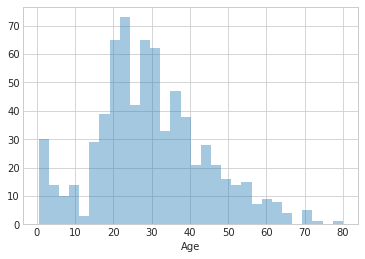

In [8]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

DATA CLEANING

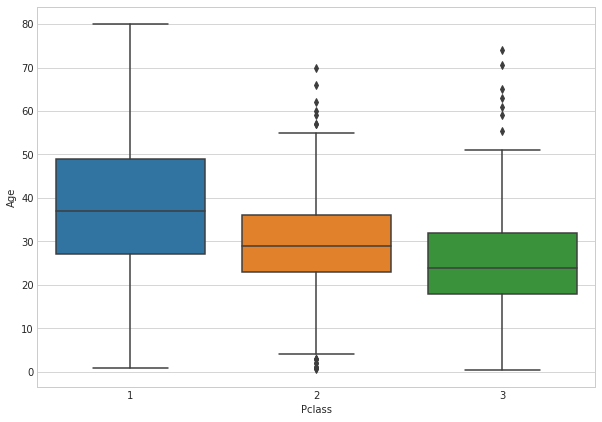

In [9]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age', data=train)

In [10]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        return train[train['Pclass'] == Pclass]['Age'].mean()
    else:
        return Age

In [12]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

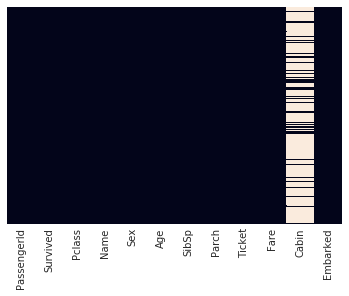

In [13]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [14]:
train.drop('Cabin',axis=1,inplace=True)

In [15]:
train.dropna(inplace=True)

CONVERTION OF CATEGORICAL VALUES

In [16]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [17]:
embark = pd.get_dummies(train['Embarked'],drop_first = True)

In [18]:
train = pd.concat([train,sex,embark], axis=1)

In [19]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [20]:
train.drop('PassengerId',axis=1,inplace=True)

TRAIN MODEL

In [21]:
x = train.drop('Survived',axis= 1)
y = train['Survived']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logmodel = LogisticRegression()

In [26]:
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

PREDICTIONS

In [27]:
predictions = logmodel.predict(x_test)

In [28]:
logmodel.coef_

array([[-0.78544445, -0.026165  , -0.21717045, -0.08743499,  0.00468497,
        -2.32086592, -0.00815357, -0.17357541]])

EVALUATION

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



### 81% PRECISION

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]])